# DTW 
- https://k-dm.work/ja/timeseries/shape/001_dtw/

In [2]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from matplotlib import pyplot as plt


## Sample 1

DTW距離: 2.0


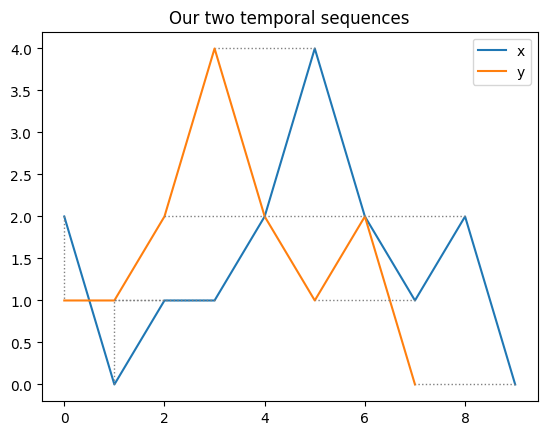

In [12]:
# 異なる2種類のデータを定義
x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)

# DTWを計算
distance, path = fastdtw(x, y, dist=euclidean)
print("DTW距離:", distance)
plt.plot(x, label='x')
plt.plot(y, label='y')

# 各点がどのように対応しているかを図示する
for x_, y_ in path:
  plt.plot([x_, y_], [x[x_], y[y_]], color='gray', linestyle='dotted', linewidth=1)
plt.legend()
plt.title('Our two temporal sequences')
plt.show()

## Sample 2

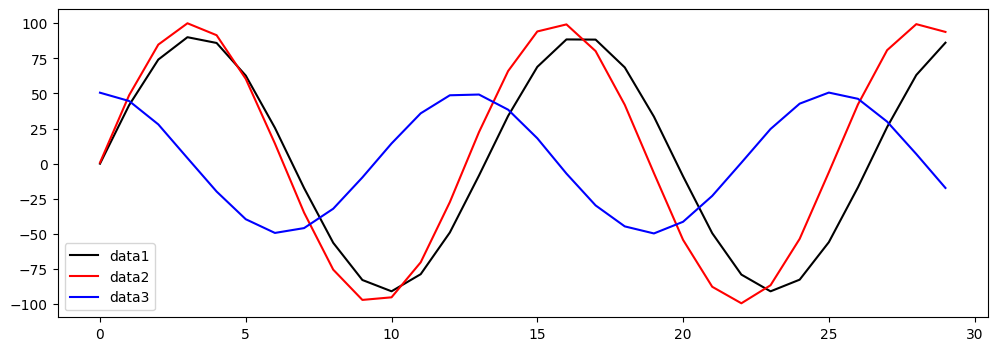

In [25]:
data1 = [91.0 * np.sin(i / 2.1) for i in range(30)]
data2 = [100.0 * np.sin(i / 2.0) + np.random.rand() for i in range(30)]
data3 = [50.0 * np.cos(i / 2.0) + np.random.rand() for i in range(30)]

plt.figure(figsize=(12, 4))

# 波形をプロット
plt.plot(data1, label="data1", color="k")
plt.plot(data2, label="data2", color="r")
plt.plot(data3, label="data3", color="b")
plt.legend()
plt.show()

In [26]:
# DTWを計算
distance_12, path_12 = fastdtw(data1, data2)
distance_13, path_13 = fastdtw(data1, data3)
distance_23, path_23 = fastdtw(data2, data3)
print(f'DTW : {distance_12}')
print(f'DTW : {distance_13}')
print(f'DTW : {distance_23}')

DTW : 297.6001867936184
DTW : 899.2196564984171
DTW : 1069.3071766184503


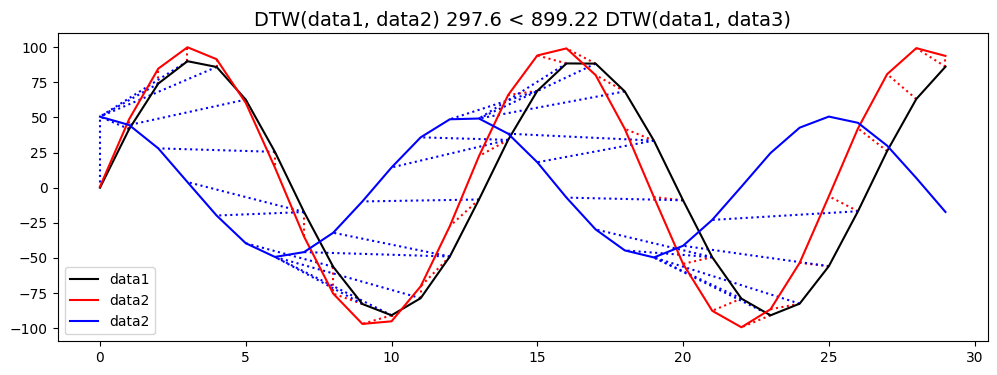

In [27]:
# 対応するポイントを線で結ぶ
plt.figure(figsize=(12, 4))
for x_12, x_13 in zip(path_12, path_13):
    plt.plot(x_12, [data1[x_12[0]], data2[x_12[1]]], color="r", linestyle="dotted")
    plt.plot(x_13, [data1[x_13[0]], data3[x_13[1]]], color="b", linestyle="dotted")

# 波形をプロット
plt.plot(data1, label="data1", color="k")
plt.plot(data2, label="data2", color="r")
plt.plot(data3, label="data2", color="b")
plt.legend()
plt.title(
    f"DTW(data1, data2) {np.round(distance_12, 3)} < {np.round(distance_13, 3)} DTW(data1, data3)",
    fontsize=14,
)
plt.show()